# K Nearest Neighbours

The KNN is a classification and regression algorithm that classifies or predicts a new data point based on other points in the dataset. The algorithm is usefull since it assumes no behaviour of the "training" data and is very fast.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set()

In [5]:
housing = fetch_california_housing(as_frame=True).frame
CH = housing.copy()

In [6]:
CH.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4992,2.2339,45.0,4.712025,1.072785,791.0,2.503165,33.99,-118.31,1.04800
5709,2.5463,32.0,3.852632,1.068421,693.0,1.823684,34.21,-118.23,2.00000
8307,5.1815,36.0,5.569507,1.177130,792.0,1.775785,33.71,-118.14,5.00001
4519,1.6888,44.0,3.071845,1.056311,1998.0,3.879612,34.04,-118.20,1.25000
4552,1.0769,52.0,1.260870,1.163043,171.0,1.858696,34.04,-118.24,1.12500
18940,5.0672,14.0,7.075665,1.018405,3196.0,3.267894,38.27,-122.06,1.71300
2546,1.8242,37.0,5.273077,1.226923,640.0,2.461538,40.78,-124.19,0.70000
5006,2.4022,47.0,4.741848,1.008152,1079.0,2.932065,34.01,-118.32,1.23400
48,0.9506,40.0,3.900000,1.218750,423.0,2.643750,37.82,-122.26,1.87500
16784,3.0625,17.0,4.680556,0.994048,884.0,1.753968,37.69,-122.45,0.87500


In [7]:
CH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
CH.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


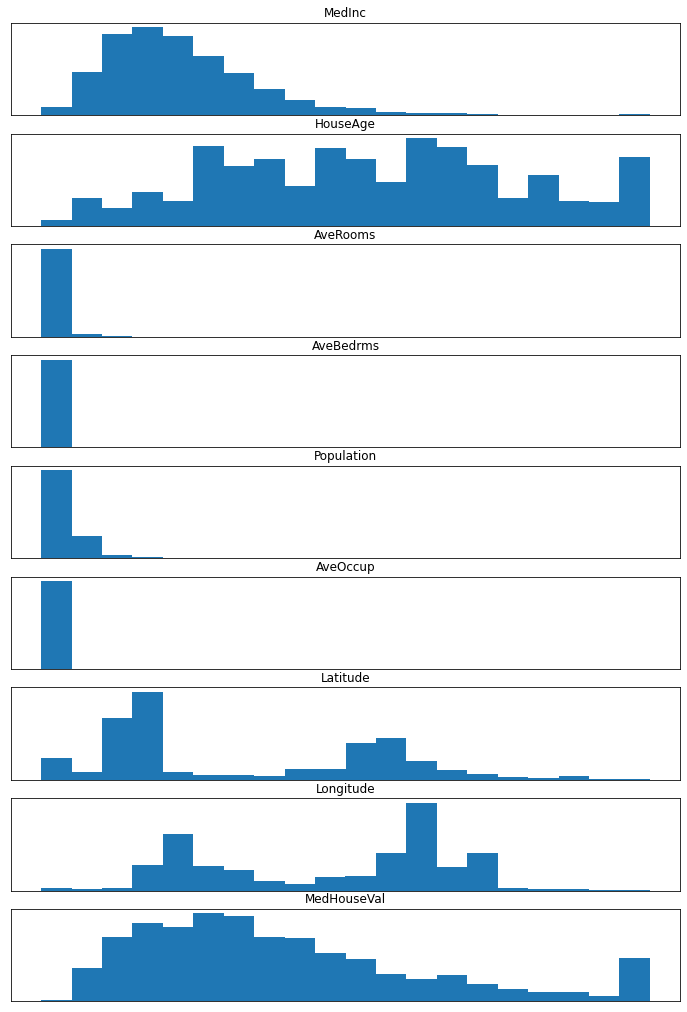

In [12]:
fig, axes = plt.subplots(len(CH.columns), figsize=(12,18))
for ax, column in zip(axes, CH.columns):
    ax.hist(CH[column], bins=20)
    ax.set(title = column, xticks = [], yticks= [])
plt.show()

In [15]:
#Set up data and labels and split them
data = CH.drop('MedHouseVal', axis=1)
labels = CH['MedHouseVal']

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)

scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

In [17]:
#KNN regressor

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5) #create the object with the amount of neighbours to consider
regressor.fit(data_train, labels_train) #Update the object with the fit
labels_pred = regressor.predict(data_test) #generate the new labels
regressor.score(data_test,labels_test) #test them against the established labels.

0.6961385986432318

In [18]:
best_score = 0
best_estimate = 0

for neighbour in range(1,40):
    regressor = KNeighborsRegressor(n_neighbors=neighbour)
    regressor.fit(data_train, labels_train)
    labels_pred = regressor.predict(data_test)
    new_score = regressor.score(data_test,labels_test)
    if new_score > best_score:
        best_score = new_score
        best_estimate = neighbour
print(f'The best result with an R squared value of {best_score} requires {best_estimate} neighbours')

The best result with an R squared value of 0.7022902826986267 requires 13 neighbours


In [20]:
#KNN classification

iris = sns.load_dataset('iris')
CI = iris.copy()
CI.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
12,4.8,3.0,1.4,0.1,setosa
99,5.7,2.8,4.1,1.3,versicolor
34,4.9,3.1,1.5,0.2,setosa
97,6.2,2.9,4.3,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor


In [21]:
data = CI.drop('species', axis=1)
labels = CI['species']

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)

scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



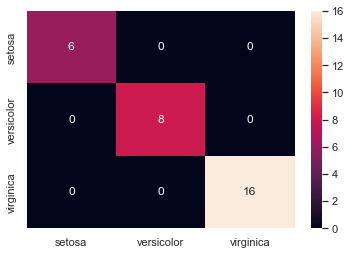

In [26]:
#basic classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier()
classifier.fit(data_train, labels_train)
labels_pred = classifier.predict(data_test)

# Adding classes names for better interpretation
classes_names = pd.unique(CI['species'])
cm = pd.DataFrame(confusion_matrix(labels_test, labels_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(labels_test, labels_pred))